# Исследование объявлений о продаже квартир

Задача: исследовать объявления о продаже недвижимости в г. Санкт-Петербурге.

Цель: выявить параметры, влияющие на стоимость квартир для автоматизированной системы, которая будет отслеживать аномалии и мошенническую деятельность. 

Данные: данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. 

## Изучение данных из файла

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
print(data.columns)

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')


### Вывод

В данных выявлены следующие проблемы: 
1. столбцы названы не единообразно. Стоит изменить названия столбцов cityCenters_nearest, ponds_around3000, parks_around3000. 
2. Выявлены неверные типы данных (Число балконов (balcony) float; Сколько дней было размещено объявление days_exposition должно быть int; число этажей в доме floors_total нужно перевести в int; is_apartment нужно перевести из строки в bool; Число парков в радиусе 3 км parks_around3000 перевести в int; Число водоёмов в радиусе 3 км ponds_around3000 перевести в int)
3. Дату публикации (first_day_expostion) нужно перевести с помощью Datetime
4. Булевы типы нужно привести к одному виду: studio -> is_studio, open_plan -> is_open_plan
5. Есть пустые значения в столбцах ponds_around3000 и ponds_nearest, parks_around3000 и parks_nearest, days_exposition, balcon, is_apartment. Но не должно стать проблемой.  

## Предобработка данных

### Редактируем названия столбцов
Ряд заголовков был переименован для более удобной работы - приведен к змеинному написанию, к строчным буквам, некоторые названия были сокращены. 

In [5]:
(data.set_axis(
    ['total_images', 'last_price', 'total_area', 'created_datetime',
     'rooms_count', 'ceiling_height', 'total_floors', 'living_area', 'floor',
     'is_apartment', 'is_studio', 'is_open_plan', 'kitchen_area', 'balcony_count',
     'locality_name', 'nearest_airport_distance', 'nearest_city_center_distance',
     'parks_in_3km_count', 'nearest_park_distance', 'ponds_in_3km_count',
     'nearest_pond_distance', 'days_before_close'], axis = 'columns', inplace = True)
)

In [6]:
data.head(10)

,total_images,last_price,total_area,created_datetime,rooms_count,ceiling_height,total_floors,living_area,floor,is_apartment,...,kitchen_area,balcony_count,locality_name,nearest_airport_distance,nearest_city_center_distance,parks_in_3km_count,nearest_park_distance,ponds_in_3km_count,nearest_pond_distance,days_before_close
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Заполнение пропусков
Были выявлены пропущенные значения в ряде столбцов. Проделаны следующие замены:
1. слишком обльшое количество пропущенных значений в is_apartment буду считать за True.
2. В столбце с числом балконов, пропуски заменены на 0, что будем считать, как в квартире нет балконов. 
3. Высота потолков заполнена медианой.
4. Пустые значения в столбцах locality_name и total_floors нельзя заполнить, а пропущенных значений не много, в связи с чем их можно удалить.
5. В столбцах с расстояниями до парков и водоемов, пропущенные значения указаывают на то, что дистанция до них более 3000 м. Тогда расстояние до ближайшего парка и водоема заполним значениями 3001. Пропущенные значения в числе парков и водоемов заменим на 0.  
6. Пустые значения по жилой площади (living_area) и площади кухни (kitchen_area) были заполнены медианой.

Пропуски в столбцах nearest_city_center_distance, nearest_airport_distance нет смысла заполнять, так как медианой их заполнить не правильно, а в малых населенных пунктах может не быть аэропорта. Также не будут заполнены пропуски в days_before_close, так как эти данные в дальнейшем для исследования не понадобятся. 


In [7]:
data.isnull().sum()

total_images                        0
last_price                          0
total_area                          0
created_datetime                    0
rooms_count                         0
ceiling_height                   9195
total_floors                       86
living_area                      1903
floor                               0
is_apartment                    20924
is_studio                           0
is_open_plan                        0
kitchen_area                     2278
balcony_count                   11519
locality_name                      49
nearest_airport_distance         5542
nearest_city_center_distance     5519
parks_in_3km_count               5518
nearest_park_distance           15620
ponds_in_3km_count               5518
nearest_pond_distance           14589
days_before_close                3181
dtype: int64

In [8]:
data['is_apartment'] = data['is_apartment'].fillna(True)
data['balcony_count'] = data['balcony_count'].fillna(0)

ceiling_height_median = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_height_median)

data.dropna(subset=['locality_name'], inplace=True)
data.dropna(subset=['total_floors'], inplace=True)

data['parks_in_3km_count'] = data['parks_in_3km_count'].fillna(0)
data['nearest_park_distance'] = data['nearest_park_distance'].fillna(3001)

data['ponds_in_3km_count'] = data['ponds_in_3km_count'].fillna(0)
data['nearest_pond_distance'] = data['nearest_pond_distance'].fillna(3001)

data[(data['parks_in_3km_count'] != 0) & (data['nearest_park_distance'] == 3001)]

,total_images,last_price,total_area,created_datetime,rooms_count,ceiling_height,total_floors,living_area,floor,is_apartment,...,kitchen_area,balcony_count,locality_name,nearest_airport_distance,nearest_city_center_distance,parks_in_3km_count,nearest_park_distance,ponds_in_3km_count,nearest_pond_distance,days_before_close


In [9]:
data.isnull().sum()

total_images                       0
last_price                         0
total_area                         0
created_datetime                   0
rooms_count                        0
ceiling_height                     0
total_floors                       0
living_area                     1865
floor                              0
is_apartment                       0
is_studio                          0
is_open_plan                       0
kitchen_area                    2222
balcony_count                      0
locality_name                      0
nearest_airport_distance        5524
nearest_city_center_distance    5501
parks_in_3km_count                 0
nearest_park_distance              0
ponds_in_3km_count                 0
nearest_pond_distance              0
days_before_close               3171
dtype: int64

In [10]:
living_area_median = data['living_area'].median()
data['living_area'] = data['living_area'].fillna(living_area_median)
kitchen_area_median = data['kitchen_area'].median()
data['kitchen_area'] = data['kitchen_area'].fillna(kitchen_area_median)
data.isnull().sum()

total_images                       0
last_price                         0
total_area                         0
created_datetime                   0
rooms_count                        0
ceiling_height                     0
total_floors                       0
living_area                        0
floor                              0
is_apartment                       0
is_studio                          0
is_open_plan                       0
kitchen_area                       0
balcony_count                      0
locality_name                      0
nearest_airport_distance        5524
nearest_city_center_distance    5501
parks_in_3km_count                 0
nearest_park_distance              0
ponds_in_3km_count                 0
nearest_pond_distance              0
days_before_close               3171
dtype: int64

### Замена типов данных
Были заменены неверные типы данных у столбцов с числом балконов/этажей/расстоянием до парков/расстоянием до водоемов (приведены к int), цена квартиры до целочисленного значения (int). Значение дат приведено к datatime.

In [11]:
data['balcony_count'] = data['balcony_count'].astype('int')
data['total_floors'] = data['total_floors'].astype('int')
data['last_price'] = data['last_price'].astype('int')
data['parks_in_3km_count'] = data['parks_in_3km_count'].astype('int')
data['ponds_in_3km_count'] = data['ponds_in_3km_count'].astype('int')
data['created_datetime'] = pd.to_datetime(data['created_datetime'], format='%Y-%m-%dT%H:%M:%S')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   total_images                  23565 non-null  int64         
 1   last_price                    23565 non-null  int64         
 2   total_area                    23565 non-null  float64       
 3   created_datetime              23565 non-null  datetime64[ns]
 4   rooms_count                   23565 non-null  int64         
 5   ceiling_height                23565 non-null  float64       
 6   total_floors                  23565 non-null  int64         
 7   living_area                   23565 non-null  float64       
 8   floor                         23565 non-null  int64         
 9   is_apartment                  23565 non-null  bool          
 10  is_studio                     23565 non-null  bool          
 11  is_open_plan                

### Выводы по предоработке данных
Таблица приведена к единообразию, в некоторых столбцах заменены вещественные значения (которые не могли там встречаться) заменены на целые числа. Записи о времени также были приведены к соответствующему типу.
Остались как есть поля (nearest_city_center_distance, nearest_airport_distance), так как их не восстановить самостоятельно. Стоит указать на это тем, кто выгружал данные. 

## Расчёты и добавление результатов в таблицу
В таблицу необходимо добавить дополнительные столбцы с информацией - по цене 1 кв. м (square_meter_price), по году/месяцу/недели/дню публикации объявления, типы этажей (floor_type), по соотношению жилой и общей площади (living_area_part), а также отношение площади кухни к общей (kitchen_area_part).

In [12]:
data['square_meter_price'] = round(data['last_price'] / data['total_area'], 2)

data['created_year'] = data['created_datetime'].dt.year
data['created_month'] = data['created_datetime'].dt.month
data['created_month'] = data['created_datetime'].dt.day
data['created_weekday'] = data['created_datetime'].dt.weekday

def get_floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['total_floors']:
        return 'последний'
    return 'другой'

data['floor_type'] =  data.apply(get_floor_type, axis=1)

data['living_area_part'] = round(data['living_area'] / data['total_area'], 2)
data['kitchen_area_part'] = round(data['kitchen_area'] / data['total_area'], 2)

data.head(10)

,total_images,last_price,total_area,created_datetime,rooms_count,ceiling_height,total_floors,living_area,floor,is_apartment,...,ponds_in_3km_count,nearest_pond_distance,days_before_close,square_meter_price,created_year,created_month,created_weekday,floor_type,living_area_part,kitchen_area_part
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,True,...,2,755.0,NaN,120370.37,2019,7,3,другой,0.47,0.23
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,True,...,0,3001.0,81.0,82920.79,2018,4,1,первый,0.46,0.27
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,True,...,2,574.0,558.0,92785.71,2015,20,3,другой,0.61,0.15
3,0,64900000,159.00,2015-07-24,3,2.65,14,30.00,9,True,...,3,234.0,424.0,408176.10,2015,24,4,другой,0.19,0.06
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,True,...,1,48.0,121.0,100000.00,2018,19,1,другой,0.32,0.41
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,True,...,0,3001.0,55.0,95065.79,2018,10,0,другой,0.47,0.30
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,True,...,0,3001.0,155.0,99195.71,2017,2,3,другой,0.28,0.39
7,5,7915000,71.60,2019-04-18,2,2.65,24,30.00,22,True,...,0,3001.0,NaN,110544.69,2019,18,3,другой,0.42,0.26
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,True,...,0,3001.0,189.0,87454.76,2018,23,2,другой,0.47,0.27
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,True,...,0,3001.0,289.0,88524.59,2017,26,6,другой,0.71,0.11


## Исследовательский анализ данных

### Изучение параметров: площадь, цена, число комнат, высота потолков


Площадь

In [13]:
data[['kitchen_area', 'living_area', 'total_area']].describe()

,kitchen_area,living_area,total_area
count,23565.000000,23565.000000,23565.000000
mean,10.423234,34.102255,60.322824
std,5.631746,21.189133,35.657060
min,1.300000,2.000000,12.000000
25%,7.300000,19.000000,40.000000
50%,9.100000,30.000000,52.000000
75%,11.410000,41.100000,69.700000
max,112.000000,409.700000,900.000000


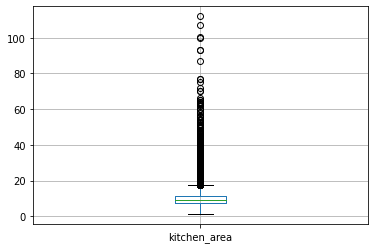

In [14]:
data.boxplot(column='kitchen_area')
plt.show()

<AxesSubplot:>

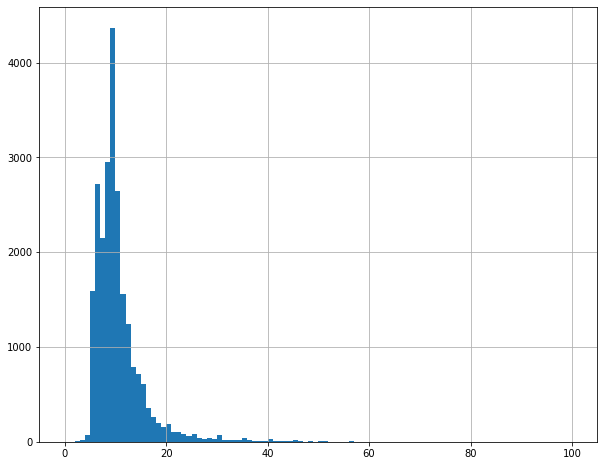

In [15]:
data['kitchen_area'].hist(bins=100, range = (0, 100), figsize=(10,8))

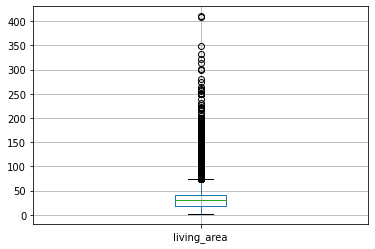

In [16]:
data.boxplot(column='living_area')
plt.show()

<AxesSubplot:>

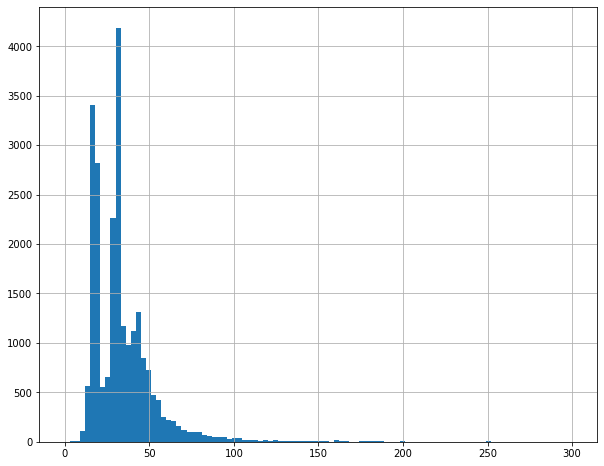

In [17]:
data['living_area'].hist(bins=100, range = (0, 300), figsize=(10,8))

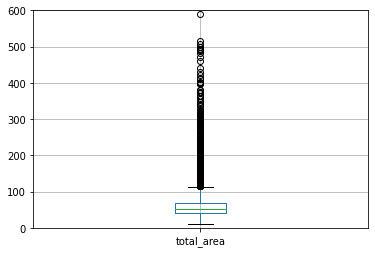

In [18]:
data.boxplot(column='total_area')
plt.ylim(0, 600)
plt.show()

<AxesSubplot:>

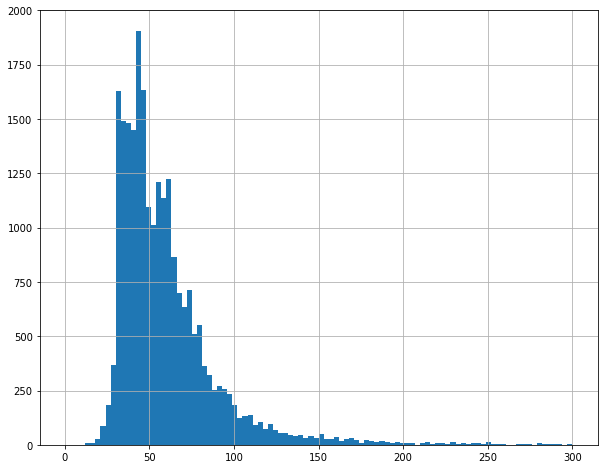

In [19]:
data['total_area'].hist(bins=100, range = (0, 300), figsize=(10,8))

In [20]:
data = data[data['total_area'] < 150]
data = data[data['kitchen_area'] < 20]
data = data[data['living_area'] < 75]

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21795 entries, 1 to 23698
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   total_images                  21795 non-null  int64         
 1   last_price                    21795 non-null  int64         
 2   total_area                    21795 non-null  float64       
 3   created_datetime              21795 non-null  datetime64[ns]
 4   rooms_count                   21795 non-null  int64         
 5   ceiling_height                21795 non-null  float64       
 6   total_floors                  21795 non-null  int64         
 7   living_area                   21795 non-null  float64       
 8   floor                         21795 non-null  int64         
 9   is_apartment                  21795 non-null  bool          
 10  is_studio                     21795 non-null  bool          
 11  is_open_plan                

Цена

In [21]:
data[['last_price', 'square_meter_price']].describe()

,last_price,square_meter_price
count,2.179500e+04,21795.000000
mean,5.206811e+06,95093.689966
std,3.343102e+06,36838.145590
min,4.300000e+05,7962.960000
25%,3.330000e+06,75403.335000
50%,4.460000e+06,93639.580000
75%,6.150000e+06,111662.530000
max,7.734900e+07,848484.850000


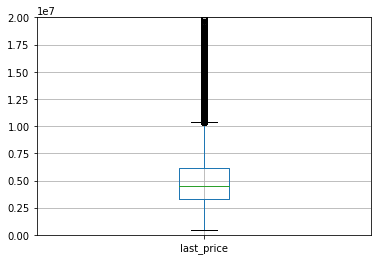

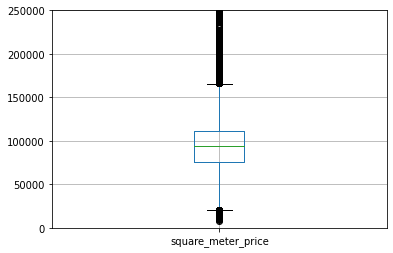

In [22]:
data.boxplot(column='last_price')
plt.ylim(0, 2 * (10 ** 7))
plt.show()
data.boxplot(column='square_meter_price')
plt.ylim(0, 250000)
plt.show()

<AxesSubplot:>

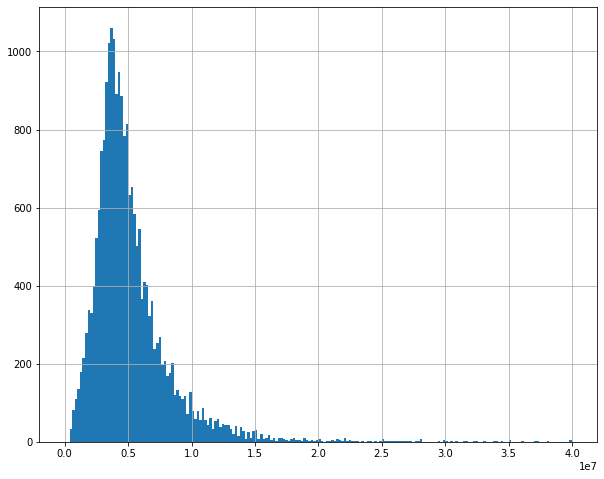

In [23]:
data['last_price'].hist(bins=200, range=(0, 0.4 * (10 ** 8)), figsize=(10,8))

<AxesSubplot:>

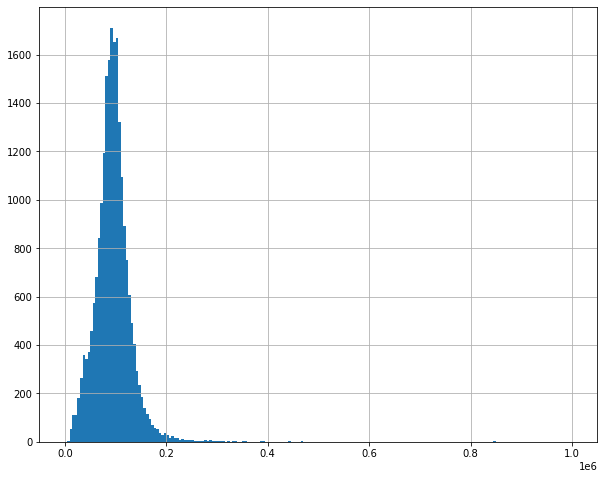

In [24]:
data['square_meter_price'].hist(bins=200, range=(0, 1000000), figsize=(10,8))

In [25]:
data = data[data['last_price'] < 1.1 * (10 ** 7)]
data = data[(data['square_meter_price'] > 24000) & (data['square_meter_price'] < 160000)]

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20204 entries, 1 to 23698
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   total_images                  20204 non-null  int64         
 1   last_price                    20204 non-null  int64         
 2   total_area                    20204 non-null  float64       
 3   created_datetime              20204 non-null  datetime64[ns]
 4   rooms_count                   20204 non-null  int64         
 5   ceiling_height                20204 non-null  float64       
 6   total_floors                  20204 non-null  int64         
 7   living_area                   20204 non-null  float64       
 8   floor                         20204 non-null  int64         
 9   is_apartment                  20204 non-null  bool          
 10  is_studio                     20204 non-null  bool          
 11  is_open_plan                

Число комнат

In [26]:
data['rooms_count'].describe()

count    20204.000000
mean         1.905761
std          0.888268
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms_count, dtype: float64

<AxesSubplot:>

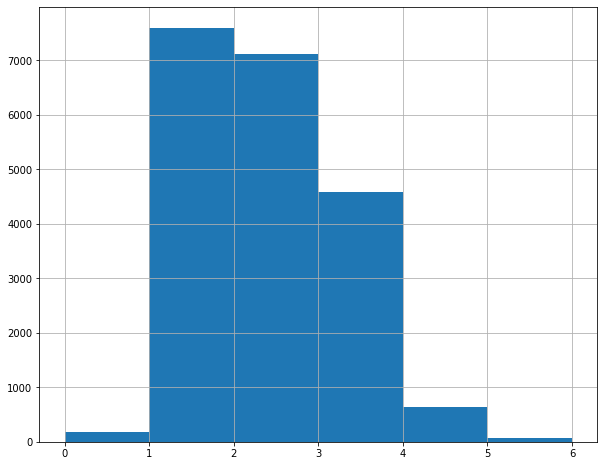

In [27]:
data['rooms_count'].hist(bins=6, figsize=(10,8))

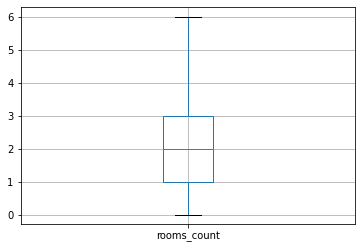

In [28]:
data.boxplot(column='rooms_count')
plt.show()

Высота потолков

In [29]:
data['ceiling_height'].describe()

count    20204.000000
mean         2.691511
std          0.788776
min          1.000000
25%          2.600000
50%          2.650000
75%          2.650000
max         32.000000
Name: ceiling_height, dtype: float64

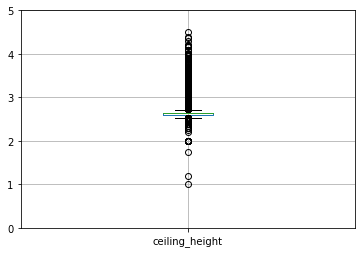

In [30]:
data.boxplot(column='ceiling_height')
plt.ylim(0,5)
plt.show()

<AxesSubplot:>

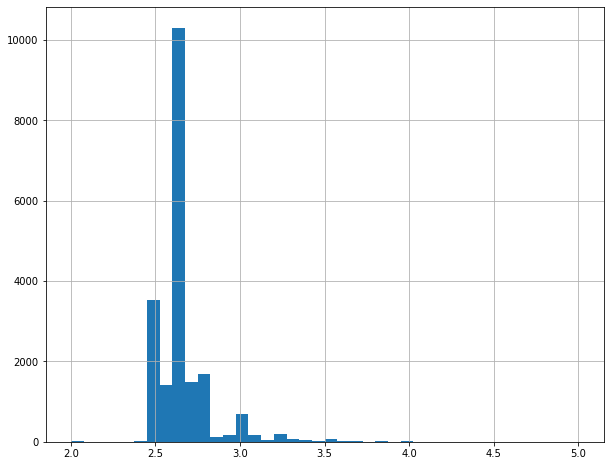

In [31]:
data['ceiling_height'].hist(bins=40, range=(2, 5), figsize=(10,8))

In [32]:
data = data[data['ceiling_height'] > 2.5]
data = data[data['ceiling_height'] <= 3]
data.reset_index(inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15979 entries, 0 to 15978
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   index                         15979 non-null  int64         
 1   total_images                  15979 non-null  int64         
 2   last_price                    15979 non-null  int64         
 3   total_area                    15979 non-null  float64       
 4   created_datetime              15979 non-null  datetime64[ns]
 5   rooms_count                   15979 non-null  int64         
 6   ceiling_height                15979 non-null  float64       
 7   total_floors                  15979 non-null  int64         
 8   living_area                   15979 non-null  float64       
 9   floor                         15979 non-null  int64         
 10  is_apartment                  15979 non-null  bool          
 11  is_studio                   

#### Выводы по 4.1.
Были удалены выбросы, чтобы сделать анализ более точным. Первоначальная выборка сократилась с 23565 до 15979, то есть приблизительно на 27%, что значительно.
Почти все параметры имеют вид нормального распределения, выбросы в количестве комнат отсутствуют. 
Неадекватное среднее отклонение есть у площадей комнат, возможно стоит проверить, выгружаемые данные.

### Время продажи квартиры

NaN значения в days_before_close могут означать, что объявление еще актуально, можно исключить эти данные из анализа. 

In [33]:
data_already_sold = data[data['days_before_close'].notnull()]
data_already_sold['days_before_close'].describe()

count    14347.000000
mean       169.803861
std        207.569152
min          2.000000
25%         43.000000
50%         90.000000
75%        215.000000
max       1553.000000
Name: days_before_close, dtype: float64

<AxesSubplot:>

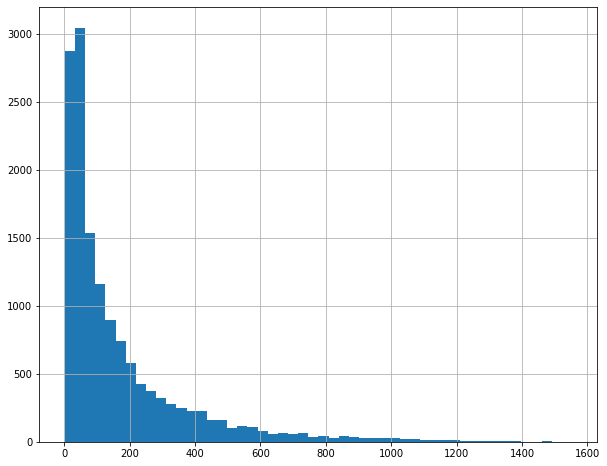

In [34]:
data_already_sold['days_before_close'].hist(bins=50, figsize=(10,8))

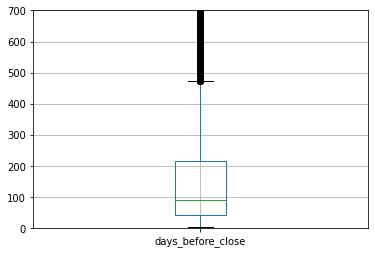

In [35]:
data_already_sold.boxplot(column='days_before_close')
plt.ylim(0,700)
plt.show()

#### Выводы по 4.2.
Время продажи можно описать Пуассоновским распределением. 
В выборке среднее больше медианы, что значит что многие квартиры из выборки продавались долго (что подтверждает "ящик с усами" и стандартное отклонение).
Быстрые продажи - до 43 дней, а необычно долгие - больше 215 дней. 

### Какие факторы больше всего влияют на стоимость квартиры?

Цена квадратного метра

In [36]:
data['last_price'].corr(data['total_area'])

0.7133791560645787

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

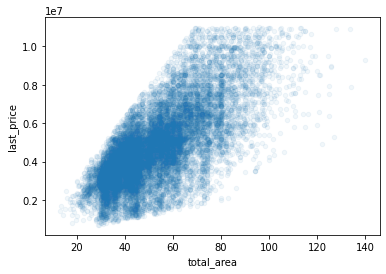

In [37]:
data.plot(x = 'total_area', y = 'last_price', kind='scatter', alpha = 0.06)

Число комнат

In [38]:
data['last_price'].corr(data['rooms_count'])

0.48078904761268815

Этаж

<AxesSubplot:xlabel='floor_type', ylabel='last_price'>

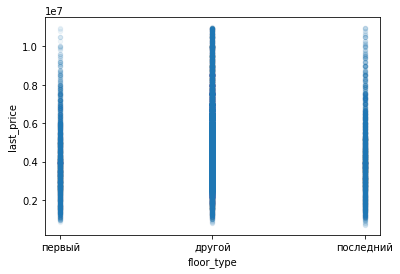

In [39]:
data.plot(x='floor_type', y='last_price', kind='scatter', alpha=0.06)

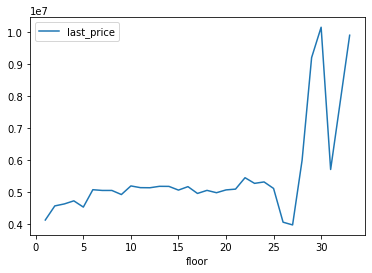

In [40]:
data.pivot_table(index=['floor'], values = 'last_price', aggfunc = 'mean').plot()
plt.show()

Удаленность от центра

In [41]:
df_with_center_distance = data[data['nearest_city_center_distance'].notnull()]
df_with_center_distance['last_price'].corr(df_with_center_distance['nearest_city_center_distance'])

-0.2966443000213581

Дата размещения

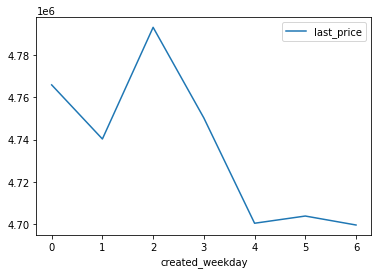

In [42]:
data.pivot_table(index=['created_weekday'], values = 'last_price', aggfunc = 'mean').plot()
plt.show()

Месяц размещения

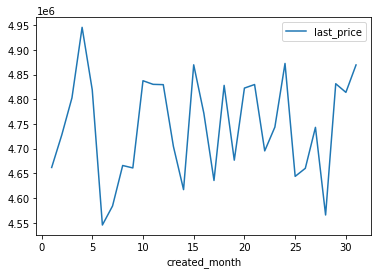

In [43]:
data.pivot_table(index=['created_month'], values = 'last_price', aggfunc = 'mean').plot()
plt.show()

Год размещения

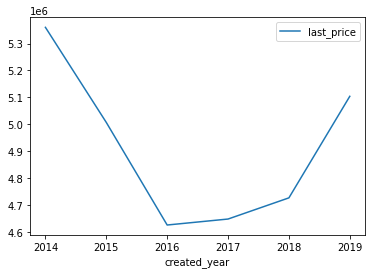

In [44]:
data.pivot_table(index=['created_year'], values = 'last_price', aggfunc = 'mean').plot()
plt.show()

#### Выводы по 4.3.
В наибольшей степени на стоимость квартиры влияет - цена квадратного метра, число комнат и удаленность от центра. Чем дальше от центра, тем дешевле квартира.
Не выявлено влияния на стоимость квартиры - этажа квартиры и время размещения объявления о продаже.

### Города с наибольшей стоимостью жилья

In [45]:
data_top_10 = data.pivot_table(index=['locality_name'], values=['floor'], aggfunc='count')
data_top_10.columns = ['count']
data_top_10 = data_top_10.sort_values(by='count', ascending=False)
data_top_10 = data_top_10.head(10)

data_top_10

,count
locality_name,
Санкт-Петербург,10045
посёлок Мурино,506
посёлок Шушары,403
Всеволожск,351
посёлок Парголово,308
деревня Кудрово,283
Пушкин,237
Гатчина,222
Колпино,217


In [46]:
data_sold = (data.query('locality_name in @data_top_10.index')
              .pivot_table(index='locality_name', values=['square_meter_price'], aggfunc='mean')
              .sort_values(by='square_meter_price', ascending=False))
data_sold

,square_meter_price
locality_name,
Санкт-Петербург,103880.755817
Пушкин,100774.761646
деревня Кудрово,92873.574700
посёлок Парголово,90231.928766
посёлок Мурино,85560.519091
посёлок Шушары,78465.273375
Колпино,75131.971014
Гатчина,69200.728423
Всеволожск,67295.974786


<AxesSubplot:xlabel='locality_name'>

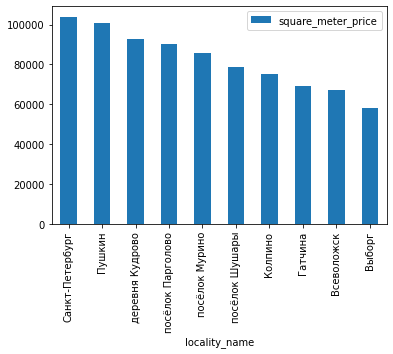

In [47]:
data_sold.plot(y='square_meter_price', kind = 'bar')

#### Выводы по 4.4.
Больше всего объявлений о продаже квартир в г. Санкт-Петербурге, меньше всего - в г. Выборге.
Наибольшая стоимость 1 кв. м жилья в г. Санкт-Петербург и г. Пушкин - более 100 тыс. руб. Наимеьшая стоиость жилья в г. Всеволожск и г. Выборг. Разница между средней стоимостью 1 кв. м в г. Санкт-Петербурге и г. Выборге значительна - более 40%. 

### Поиск центра в г. Санкт-Петербурге

In [48]:
data['nearest_city_center_distance_km'] = round(data['nearest_city_center_distance'] / 1000, 0)
data['nearest_city_center_distance_km'] = data['nearest_city_center_distance_km'].astype('float')
data_spb = data[data['locality_name'] == 'Санкт-Петербург']
data_spb[['nearest_city_center_distance', 'nearest_city_center_distance_km']]

,nearest_city_center_distance,nearest_city_center_distance_km
1,13933.0,14.0
4,11634.0,12.0
6,13878.0,14.0
11,14259.0,14.0
12,14616.0,15.0
...,...,...
15970,11602.0,12.0
15971,16704.0,17.0
15972,16081.0,16.0
15973,6263.0,6.0


<AxesSubplot:xlabel='nearest_city_center_distance_km'>

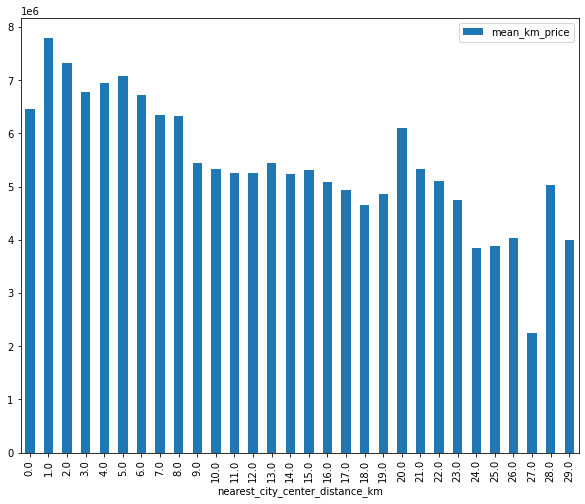

In [49]:
data_spb_pivot = data_spb.pivot_table(index='nearest_city_center_distance_km', values='last_price', aggfunc='mean')
data_spb_pivot.columns = ['mean_km_price']
data_spb_pivot.plot(kind='bar', figsize=(10,8))

#### Выводы по 4.5
Центром города можно считать зону до 8 км. Отдельные пики средней цены отмечаются и дальше от центра, вероятно влияние на стоимость оказывают также отдельные районы.

### Квартиры в центре

In [50]:
data_spb_center = data_spb.query('nearest_city_center_distance_km <= 8')
to_describe_fields = ['total_area', 'last_price', 'rooms_count', 'ceiling_height']
data_spb[to_describe_fields].join(data_spb_center[to_describe_fields], rsuffix='_center').describe()

,total_area,last_price,rooms_count,ceiling_height,total_area_center,last_price_center,rooms_count_center,ceiling_height_center
count,10045.000000,1.004500e+04,10045.000000,10045.000000,1583.000000,1.583000e+03,1583.000000,1583.000000
mean,53.467377,5.469011e+06,1.899353,2.677920,61.876753,6.774394e+06,2.204043,2.735527
std,17.722809,1.875918e+06,0.889742,0.101148,19.678018,2.009906e+06,0.915209,0.136318
min,13.000000,1.190000e+06,0.000000,2.510000,13.200000,1.686000e+06,0.000000,2.510000
25%,40.000000,4.000000e+06,1.000000,2.650000,46.000000,5.250500e+06,2.000000,2.650000
50%,50.000000,5.000000e+06,2.000000,2.650000,60.000000,6.650000e+06,2.000000,2.650000
75%,64.500000,6.575000e+06,3.000000,2.700000,75.400000,8.338412e+06,3.000000,2.800000
max,133.600000,1.099900e+07,6.000000,3.000000,133.600000,1.099000e+07,5.000000,3.000000


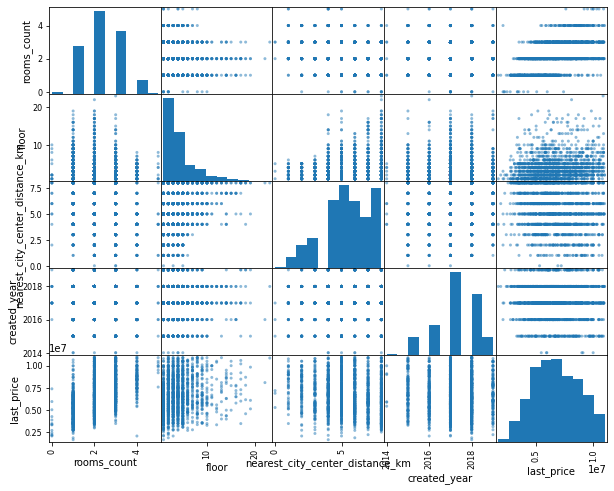

In [51]:
data_spb_center_only_needed = data_spb_center[['rooms_count', 'floor', 'nearest_city_center_distance_km', 'created_year', 'last_price']]
data_spb_only_needed = data_spb[['rooms_count', 'floor', 'nearest_city_center_distance_km', 'created_year', 'last_price']]

pd.plotting.scatter_matrix(data_spb_center_only_needed, figsize=(10,8))
None

#### Выводы по 4.5
Значительно различается между центром и другуми частями города цена и общая площадь квартир. Также чем ближе квартира к центру, тем вероятнее она будет на более низком этаже. В центре гораздо меньше однокомнатных квартир. Остальные параметры в центре города сопоставимы с другими частями города.

## Общий вывод

Задачей исследования являлось - выявить параметры, влияющией на рыночную стоимость недвижимости, чтобы построить автоматизированную систему.
По итогам анализа, можно выделить ряд следующих факторов, оказывающих влияние на стоимость недвижимости, в большей степени:
1. Город в котором находится квартира (разница в стоимости может превышать 40%). Наибольшая стоимость 1 кв. м жилья в г. Санкт-Петербург и г. Пушкин - более 100 тыс. руб. Наимеьшая стоиость жилья в г. Всеволожск и г. Выборг. Разница между средней стоимостью 1 кв. м в г. Санкт-Петербурге и г. Выборге значительна - более 40%. 
2. Площадь квартиры и количество комнат. Корреляция стоимости квартиры и площади высокая (0,71), корреляция стоимости квартиры с количеством комнат - средняя (0,49). 
3. Расстаяние от центра города до квартиры. Корреляция между стоимостью квартиры и удаленностью от центра отрицательная и составляет (-0,29). 

Также можно добавить, что продажи прошли очень быстро, если заняли меньше 43 дней, а необычно долго если больше 215 дней.